<a href="https://colab.research.google.com/github/AmeniZoueri/MNIST-Digit-Recognition-with-CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset and split it into training, validation, and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_valid = x_train[:48000], x_train[48000:]
y_train, y_valid = y_train[:48000], y_train[48000:]

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255
x_valid = x_valid.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [6]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [7]:
# Train the model with validation
batch_size = 128
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_valid, y_valid))

Epoch 1/10
375/375 [==============================] - 46s 121ms/step - loss: 0.3069 - accuracy: 0.9057 - val_loss: 0.0689 - val_accuracy: 0.9793
Epoch 2/10
375/375 [==============================] - 41s 110ms/step - loss: 0.0968 - accuracy: 0.9721 - val_loss: 0.0502 - val_accuracy: 0.9851
Epoch 3/10
375/375 [==============================] - 42s 112ms/step - loss: 0.0701 - accuracy: 0.9788 - val_loss: 0.0444 - val_accuracy: 0.9867
Epoch 4/10
375/375 [==============================] - 41s 109ms/step - loss: 0.0551 - accuracy: 0.9837 - val_loss: 0.0397 - val_accuracy: 0.9882
Epoch 5/10
375/375 [==============================] - 44s 117ms/step - loss: 0.0464 - accuracy: 0.9860 - val_loss: 0.0418 - val_accuracy: 0.9886
Epoch 6/10
375/375 [==============================] - 41s 109ms/step - loss: 0.0403 - accuracy: 0.9880 - val_loss: 0.0392 - val_accuracy: 0.9892
Epoch 7/10
375/375 [==============================] - 41s 109ms/step - loss: 0.0371 - accuracy: 0.9891 - val_loss: 0.0330 - val_ac

In [8]:
# Define a function to plot 20 random images from the training set
def plot_images():
    # Get 20 random indices from the training set
    indices = np.random.randint(0, len(x_train), size=20)

    # Get the corresponding images and labels
    images = x_train[indices]
    labels = y_train[indices]

    # Make predictions on the images
    predictions = model.predict(images)

    # Plot the images with their true and predicted labels
    fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8))
    fig.suptitle('Random images with true and predicted labels', fontsize=16)
    for i, ax in enumerate(axes.flat):
        # Plot the image
        ax.imshow(images[i].reshape(28, 28), cmap='gray')

        # Get the true label
        true_label = np.argmax(labels[i])

        # Get the predicted label
        predicted_label = np.argmax(predictions[i])

        # Color code the label based on whether the prediction was correct or not
        if true_label == predicted_label:
            color = 'green'
        else:
            color = 'red'


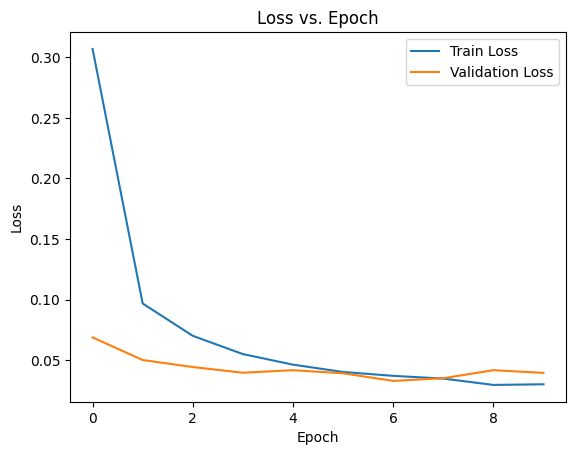

In [9]:
import matplotlib.pyplot as plt

# Plot the loss function and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

In [10]:
def plot_images():
    # Get 20 random indices from the training set
    indices = np.random.randint(0, len(x_train), size=20)

    # Get the corresponding images and labels
    images = x_train[indices]
    true_labels = y_train[indices]

    # Make predictions on the images
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Create a grid of subplots with the specified spacing
    fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8), gridspec_kw={'wspace': 0.3, 'hspace': 0.6})
    fig.suptitle('Random images with true and predicted labels', fontsize=16)

    # Plot each image and its true/predicted label on a subplot
    for i, ax in enumerate(axes.flat):
        # Plot the image
        ax.imshow(images[i].reshape(28, 28), cmap='gray')

        # Get the true and predicted labels
        true_label = np.argmax(true_labels[i])
        predicted_label = predicted_labels[i]

        # Color code the label based on whether the prediction was correct or not
        if true_label == predicted_label:
            color = 'green'
        else:
            color = 'red'

        # Add the true and predicted labels to the image
        ax.set_xlabel(f'True: {true_label}\nPredicted: {predicted_label}', color=color, fontsize=12)

        # Remove ticks from the plot
        ax.set_xticks([])
        ax.set_yticks([])

    # Show the plot
    plt.show()


1/1 [==============================] - 0s 105ms/step


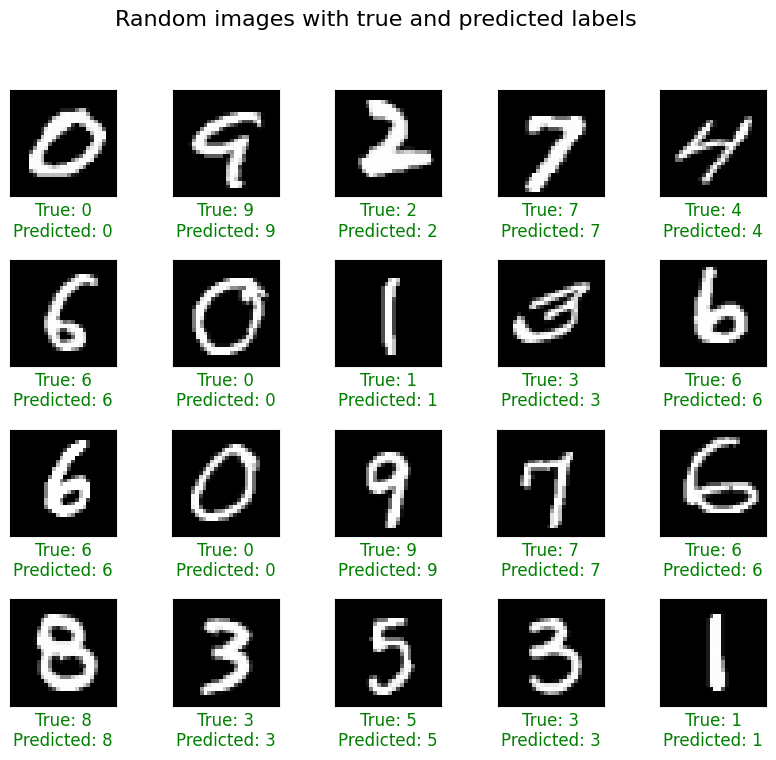

In [11]:
plot_images()